### Model:

* $I$ species observed at $J$ locations over time.

* $Y_{tij} = 1$ if species $j$ (for $j=1,\dots,J$) is observed at location $i$ (for $i=1,\dots,I$) at time $t$, and zero otherwise.

* Assume latent factors $X_t \in \mathbb{R}^{I \times K}$; $X_t= X_{tik}$, $i=1,\dots,I$, $k=1,\dots,K$.

* $X_{ti} \in \mathbb{R}^K$ are $K$ latent factors at location $i$. Model assumes that there are some latent factors such as food, water, sunlight etc.

* Logit model:
\begin{equation}
\mathrm{P}(Y_{tij} = 1) = \frac{1}{1+\exp\{-(\alpha + \lambda^\top_j X_{ti})\}},
\quad 
i = 1, \dots, I, ~ j = 1, \dots, J,
\end{equation}
where $\lambda_j \in \mathbb{R}^K$ for $j=1,\dots,J$ are the effects of the latent factors on species $j$ (for example, how much food does a species need, how much water do they need, etc).

* Assume basic auto-regressive model for $X_t$:
\begin{equation*}
X_t = c + \phi X_{t-1} + \varepsilon_t, \quad \varepsilon_t \stackrel{\text{i.i.d.}}{\sim} \mathcal{N}(0,\sigma^2).
\end{equation*}


In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, multiprocessing as mp
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from tqdm import trange
from ecology_functions import *

In [2]:
T = 100
I = 4  # number of locations
J = 3  # number of species
K = 2  # number of latent factors

In [3]:
print("Dimension of state space     = ", I*K)
print("Dimension of parameter space = ", J+J*K)

Dimension of state space     =  8
Dimension of parameter space =  9


In [25]:
def return_lmbda_corr(theta_chain, plot=True) :
    lmbda_chain = theta_chain[1]
    n_mcmc = np.shape(lmbda_chain_p5)[0]
    corr_lmbda = np.zeros((3,n_mcmc))
    corr_lmbda[0] = np.sum(lmbda_chain[:,0]*lmbda_chain[:,1],1)\
                     /(np.linalg.norm(lmbda_chain[:,0],axis=1)*np.linalg.norm(lmbda_chain[:,1],axis=1))
    corr_lmbda[1] = np.sum(lmbda_chain[:,1]*lmbda_chain[:,2],1)\
                     /(np.linalg.norm(lmbda_chain[:,1],axis=1)*np.linalg.norm(lmbda_chain[:,2],axis=1))
    corr_lmbda[2] = np.sum(lmbda_chain[:,2]*lmbda_chain[:,0],1)\
                     /(np.linalg.norm(lmbda_chain[:,2],axis=1)*np.linalg.norm(lmbda_chain[:,0],axis=1))

    if plot :
        plt.rcParams['figure.figsize'] = (18, 3)
        for idx in range(3) :
            plt.subplot(1,3,idx+1)
            plt.plot(corr_lmbda[idx])
            plt.grid(True)
    
    return corr_lmbda

In [4]:
lmbda = npr.randn(J,K)
alpha = npr.randn(J)
c = 0
phi = 0.5
logsigmasq = 0
x_0 = npr.randn(I,K)

theta = [alpha, lmbda, c, phi, logsigmasq]
Y, X = simulate_data(x_0, T, J, theta)

In [5]:
n_particles = 500
alpha_grad, lmbda_grad, c_grad, phi_grad, logsigmasq_grad, logNC = \
get_grads(Y, x_0, n_particles, theta, Tmax=100, Imax=I, Jmax=J, Kmax=K, rep=200)

In [6]:
n_particles = 500
n_mcmc = 10_000
update = [1, 1, 0, 0, 0]
theta_0 = theta

In [7]:
power = 1
scale = np.asarray([1e-1*np.eye(J), 1e-1*np.eye(J*K), 0, 0, 0])/np.sqrt(power)
theta_chain_p1, _, _ = pMCMC_RW_mult(x_0, Y, theta_0, n_particles, n_mcmc, scale, update, power=power, adapt=False)

/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)
100%|██████████| 10000/10000 [24:31<00:00,  7.44it/s]

4.9 % acceptance rate


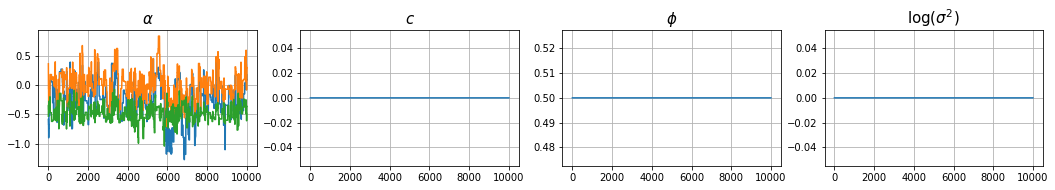

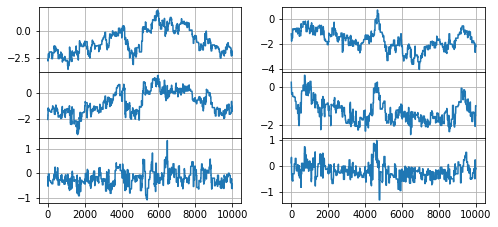

In [8]:
plot_theta_trajectory(theta_chain_p1)

In [9]:
theta_chain_p1 = theta_chain

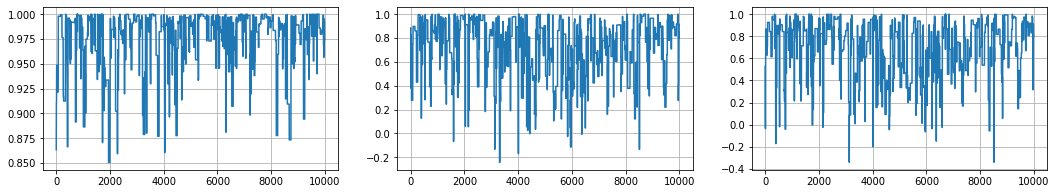

In [26]:
corr_lmbda_p1 = return_lmbda_corr(theta_chain_p1, plot=True)

In [11]:
print(np.mean(corr_lmbda_p1,1))
print(np.std(corr_lmbda_p1,1))

[0.97473912 0.7321869  0.69776984]
[0.0328449  0.24278375 0.2617584 ]


In [27]:
power = 5
scale = np.asarray([1e-1*np.eye(J), 1e-1*np.eye(J*K), 0, 0, 0])/np.sqrt(power)
n_particles = 1000
theta_chain_p5, _, _ = pMCMC_RW_mult(x_0, Y, theta_0, n_particles, n_mcmc, scale, update, power=power, adapt=False)

/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/postdoc/dsen/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:792: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, order=order, subok=subok, copy=True)
100%|██████████| 10000/10000 [49:32<00:00,  2.25it/s] 

2.2 % acceptance rate


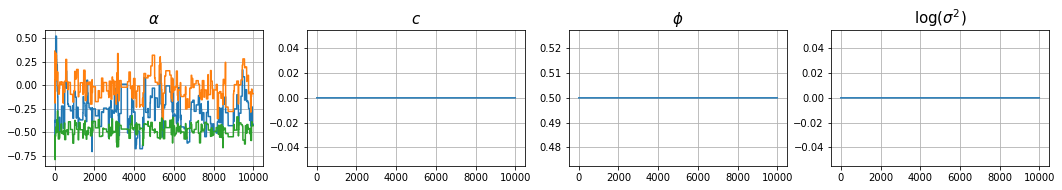

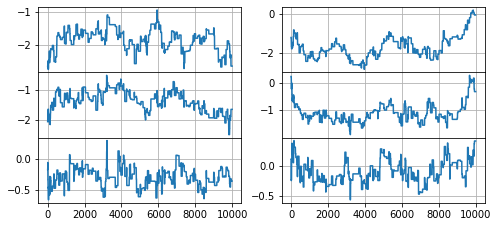

In [30]:
plot_theta_trajectory(theta_chain_p5)

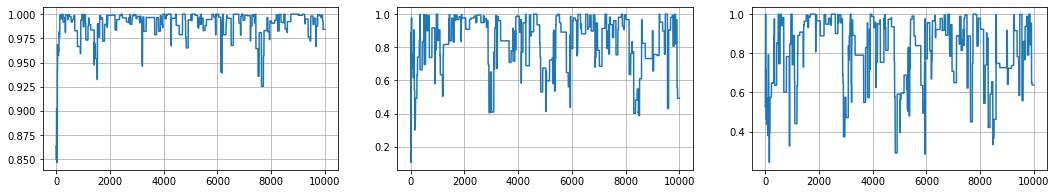

In [31]:
corr_lmbda_p5 = return_lmbda_corr(theta_chain_p5, plot=True)

In [32]:
print(np.mean(corr_lmbda_p5,1))
print(np.mean(corr_lmbda_p1,1))
print(np.std(corr_lmbda_p5,1))

[0.98983791 0.83459012 0.81046701]
[0.97473912 0.7321869  0.69776984]
[0.01491115 0.15684402 0.17437108]


In [33]:
print(np.var(corr_lmbda_p1,1)/np.var(corr_lmbda_p5,1))

[4.85191923 2.39609104 2.2534729 ]
